# トランスフォーマーにおけるPositional Encodingの確認
* 偶数番目  
PE_{pos, 2i}   = sin(pos / 10000^{2i / dmodel})   
* 奇数番目  
PE_{pos, 2i+1} = cos(pos / 10000^{2i / dmodel}) 

In [1]:
import numpy as np
from scipy import sin, cos

In [9]:
# 単語の長さ
max_length = 20

# 単語埋め込みの次元数
dmodel = 50

In [21]:
# 配列の初期化
PE_mat = np.zeros((max_length, dmodel))

for pos in range(max_length):
    for i in range(dmodel):
        if i%2==0:
            """
            偶数番目
            """
            PE = sin(pos/10000**(2*i/dmodel))
        else:
            """
            奇数番目
            """
            PE = cos(pos/10000**(2*i/dmodel))
        
        PE_mat[pos, i] = PE
        
print(PE_mat.round(3))

[[ 0.     1.     0.     1.     0.     1.     0.     1.     0.     1.
   0.     1.     0.     1.     0.     1.     0.     1.     0.     1.
   0.     1.     0.     1.     0.     1.     0.     1.     0.     1.
   0.     1.     0.     1.     0.     1.     0.     1.     0.     1.
   0.     1.     0.     1.     0.     1.     0.     1.     0.     1.   ]
 [ 0.841  0.77   0.461  0.946  0.227  0.987  0.109  0.997  0.052  0.999
   0.025  1.     0.012  1.     0.006  1.     0.003  1.     0.001  1.
   0.001  1.     0.     1.     0.     1.     0.     1.     0.     1.
   0.     1.     0.     1.     0.     1.     0.     1.     0.     1.
   0.     1.     0.     1.     0.     1.     0.     1.     0.     1.   ]
 [ 0.909  0.186  0.818  0.789  0.442  0.95   0.218  0.989  0.105  0.997
   0.05   0.999  0.024  1.     0.012  1.     0.006  1.     0.003  1.
   0.001  1.     0.001  1.     0.     1.     0.     1.     0.     1.
   0.     1.     0.     1.     0.     1.     0.     1.     0.     1.
   0.     1.     0. 

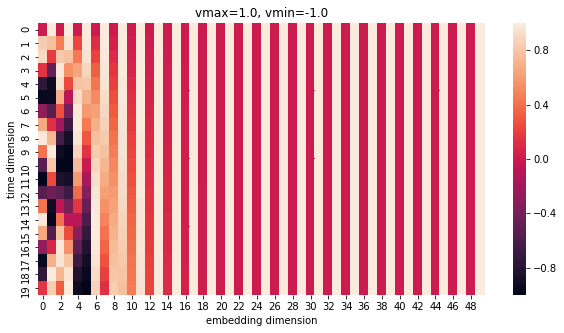

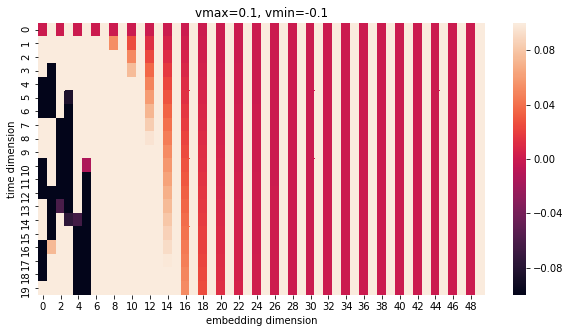

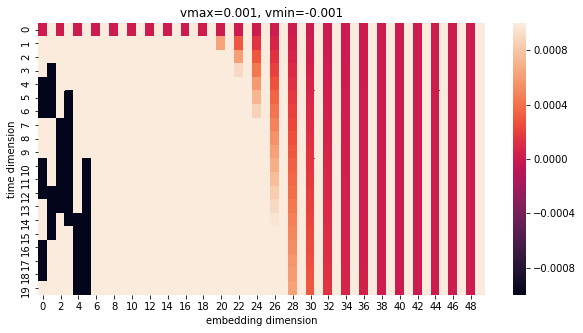

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

li_vmax = [1.0, 1e-1, 1e-3]
li_vmin  = [-1.0, -1e-1, -1e-3]
for vmax, vmin in zip(li_vmax, li_vmin):
    """
    値が小さいので、カラーレンジを変更したグラフを複数作成する
    """
    plt.figure(figsize=(10,5))
    ax = sns.heatmap(PE_mat, vmax=vmax, vmin=vmin)
    plt.title("vmax=%s, vmin=%s"%(vmax, vmin))
    plt.xlabel("embedding dimension")
    plt.ylabel("time dimension")
    plt.show()

In [37]:
print(PE_mat[:3,:4].round(3))

[[0.    1.    0.    1.   ]
 [0.841 0.77  0.461 0.946]
 [0.909 0.186 0.818 0.789]]
